
# PREDICTING LIFE EXPECTANCY

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing, linear_model, model_selection, metrics

Reading Life expectancy dataset using pandas

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
#printing info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
#printing all countries

# more options can be specified also
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df['Country'].value_counts())

Afghanistan                                             16
Peru                                                    16
Nicaragua                                               16
Niger                                                   16
Nigeria                                                 16
Norway                                                  16
Oman                                                    16
Pakistan                                                16
Panama                                                  16
Papua New Guinea                                        16
Paraguay                                                16
Philippines                                             16
Lebanon                                                 16
Poland                                                  16
Portugal                                                16
Qatar                                                   16
Republic of Korea                                       

Droping data of countries that contains null or infinite values. Now the dataset has no missing values

In [5]:
df = df.dropna(axis = 0)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [6]:
df['Status'].value_counts()

Developing    1407
Developed      242
Name: Status, dtype: int64

Converting the Status column to 0's and 1's to use it in model

In [7]:
label_encoder= preprocessing.LabelEncoder()
df.loc[:,'Status'] = label_encoder.fit_transform(df.loc[:,'Status'])
df['Status'].value_counts()

d:\python\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


1    1407
0     242
Name: Status, dtype: int64

Converting Countries column also to use it in model

In [8]:
df.loc[:, 'Country'] = label_encoder.fit_transform(df.loc[:, 'Country'])
df['Country'].value_counts()

0      16
1      16
65     15
80     15
79     15
       ..
58      5
115     4
88      4
53      2
38      1
Name: Country, Length: 133, dtype: int64

Dropping the coorelated features

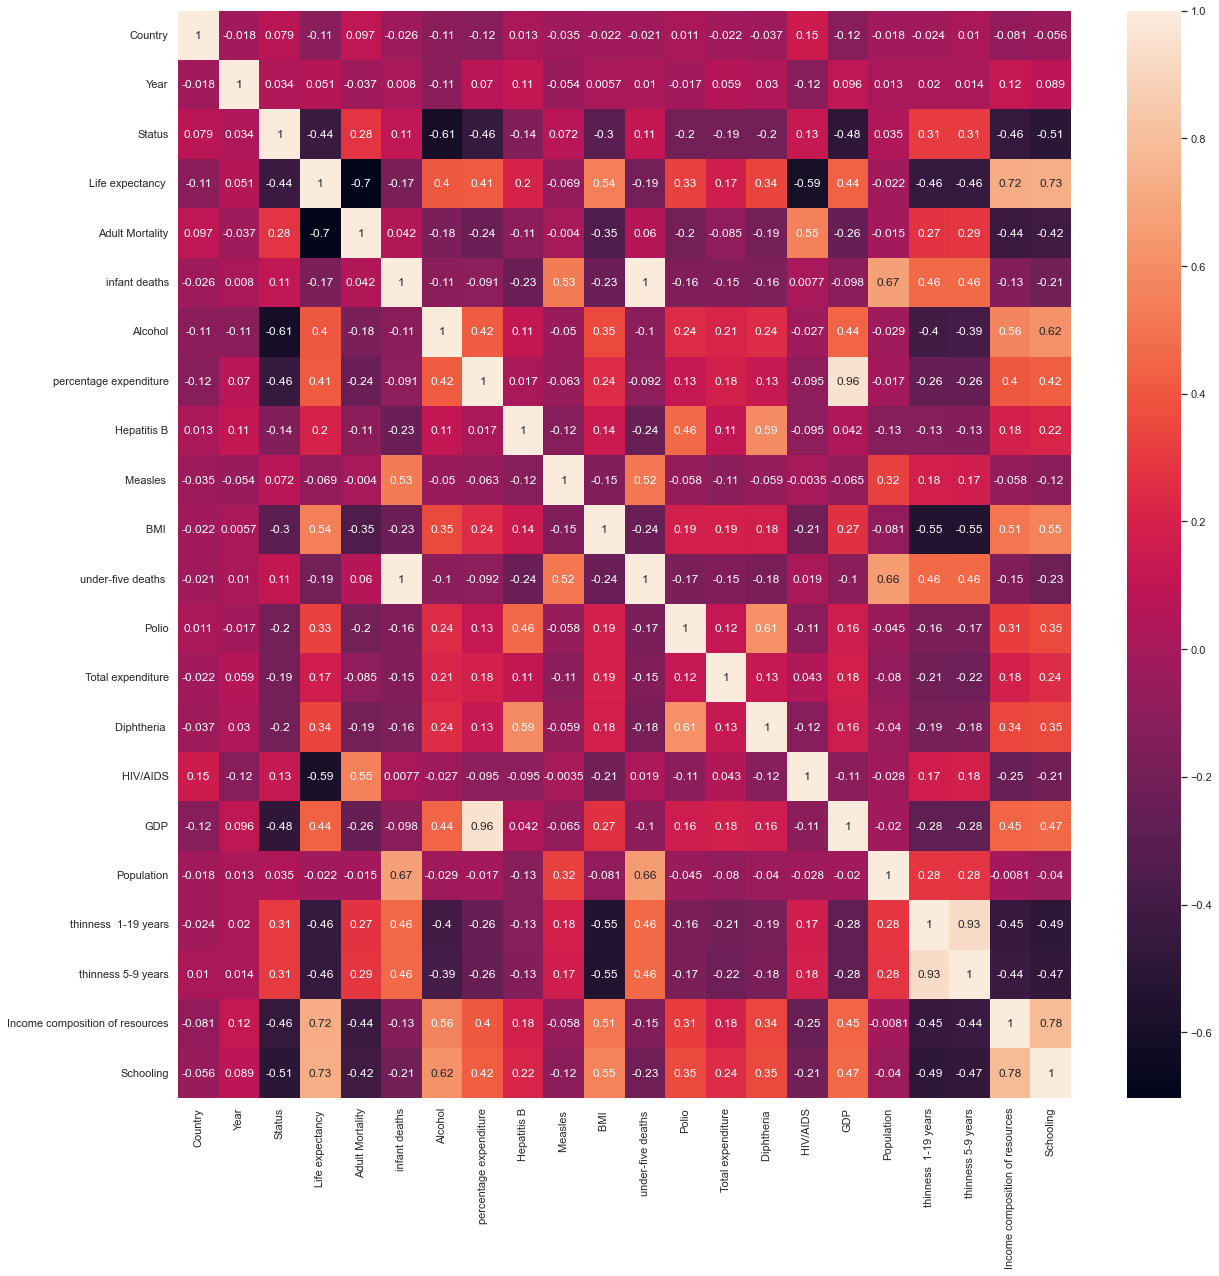

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

Correlation map of the features. 1 means positively correlated, -1 means negatively correlated. Infant deaths and Under-Five deaths are positively correlated so we need to drop one of them. GDP and percentage expenditure are highly correlated too. Also thinness 1-19 years and thinness 5-9 are highly correlated. I would like to drop one of the features, if their correlation is bigger than 0.75 or less than -0.75. So I will drop Infant deaths (because under-five also includes it), percentage expenditure (I think GDP has more important informations) and thinness 5-9 years (because thinness 1-19 also includes it) as well as Income composition of resources which has 0.78 correlation with Schooling.

In [10]:
df =df.drop(labels=['Income composition of resources', ' thinness 5-9 years', 
                'infant deaths', 'percentage expenditure'], axis=1)
df

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
0,0,2015,1,65.0,263.0,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,10.1
1,0,2014,1,59.9,271.0,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,10.0
2,0,2013,1,59.9,268.0,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,9.9
3,0,2012,1,59.5,272.0,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,9.8
4,0,2011,1,59.2,275.0,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,132,2004,1,44.3,723.0,4.36,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.2
2934,132,2003,1,44.5,715.0,4.06,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.5
2935,132,2002,1,44.8,73.0,4.43,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,10.0
2936,132,2001,1,45.3,686.0,1.72,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,9.8


Y label of the model will be Life expectancy column. So we seperate it from the dataframe.

In [11]:
y = df['Life expectancy ']
df = df.drop(labels='Life expectancy ', axis=1)
type(y)

pandas.core.series.Series

In [12]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 1649, dtype: float64

In [13]:
y = y.to_numpy(dtype='float64')
y

array([65. , 59.9, 59.9, ..., 44.8, 45.3, 46. ])

Dividing the dataset into train, validation and test sets. %80 training set, %10 validation set, %10 test set.

In [14]:
#dividing the dataset into train and test sets
x_train, x_test, y_train, y_test = model_selection.train_test_split(df, y, test_size=0.2, random_state=42)

#dividing the testset into validation and test sets
x_valid, x_test, y_valid, y_test = model_selection.train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [15]:
print("x_train shape :  " , x_train.shape)
print("x_valid shape :  " , x_valid.shape)
print("x_test shape :  " , x_test.shape)

x_train shape :   (1319, 17)
x_valid shape :   (165, 17)
x_test shape :   (165, 17)


In [16]:
x_train

,Country,Year,Status,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
1014,47,2011,1,263.0,1.64,91.0,120,26.1,58,91.0,4.81,91.0,1.3,1574.978653,25121796.0,6.9,10.9
93,4,2002,1,138.0,7.81,66.0,0,55.1,13,94.0,8.31,93.0,0.1,2579.193168,3788937.0,1.2,16.3
2015,96,2007,1,133.0,4.29,93.0,0,5.2,15,93.0,4.60,93.0,0.3,3611.214700,28292724.0,1.2,13.2
2929,132,2008,1,632.0,3.56,75.0,0,28.6,46,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,9.7
2583,118,2001,1,194.0,5.92,95.0,7319,19.4,20,97.0,3.32,96.0,0.8,1893.145377,63543322.0,9.3,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,92,2006,1,179.0,0.03,78.0,7641,19.5,458,77.0,3.40,78.0,0.1,873.772727,15793993.0,21.0,6.5
2223,104,2009,1,21.0,4.13,98.0,0,26.2,0,99.0,6.65,98.0,0.9,199.571460,17813.0,6.3,10.1
1528,70,2009,0,192.0,12.40,95.0,0,59.7,0,98.0,7.53,98.0,0.1,11837.391300,3162916.0,2.8,16.6
2576,118,2008,1,162.0,5.92,98.0,7790,25.7,13,99.0,3.92,99.0,0.3,4378.687460,6654576.0,8.5,12.9


Standardization the features using Sklearn. Fitted the train set (because we only want to use these values) and transformed all sets.

In [17]:
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [18]:
x_train

array([[-0.51128185,  0.78367891,  0.41023228, ...,  0.17827985,
         0.44055795, -0.42801883],
       [-1.61551902, -1.43186106,  0.41023228, ..., -0.16605599,
        -0.79715621,  1.49260545],
       [ 0.74703494, -0.20100552,  0.41023228, ...,  0.22946212,
        -0.79715621,  0.39002484],
       ...,
       [ 0.07935664,  0.29133669, -2.43764338, ..., -0.17616066,
        -0.44972767,  1.59930679],
       [ 1.31199349,  0.04516559,  0.41023228, ..., -0.11980142,
         0.78798649,  0.28332349],
       [ 0.6443152 ,  0.5375078 ,  0.41023228, ..., -0.19886689,
        -0.58001337, -1.63730078]])

Model : Linear Regression

Using Linear Regression as the first model. Model is trained on the train set and made predictions for validation set. Mean Squared Error is used to compute the loss.

In [19]:
model = linear_model.LinearRegression()
model.fit(X=x_train, y=y_train)

LinearRegression()

In [20]:
model.coef_

array([-0.10567939, -0.35967368, -0.36919951, -2.37878521, -0.60171628,
       -0.23721105,  0.11492395,  0.7098343 , -0.27959595,  0.22637469,
        0.20047612,  0.62242529, -2.78514227,  0.85264502,  0.1685407 ,
       -0.40234467,  3.7535655 ])

In [21]:
model.intercept_

69.14761182714179

In [22]:
model_output = model.predict(x_valid)

In [23]:
metrics.mean_squared_error(y_valid, model_output)

14.462229070381316

In [24]:
y_pred = model.predict(x_test)

In [25]:
metrics.r2_score(y_pred, y_test)
    

0.718232787305368

In [26]:
def predict():
    country_number = country['values'].index(country.get())
    status_number = c_status['values'].index(c_status.get())
    inp = [country_number, int(yearnumber.get()), status_number, float(amnumber.get()), float(alcoholnumber.get()), float(hbnumber.get()), float(mnumber.get()), float(bminumber.get()), float(ufdnumber.get()), float(polionumber.get()),float(tenumber.get()), float(dnumber.get()), float(hivnumber.get()), float(gdpnumber.get()), float(Populationnumber.get()), float(tnumber.get()), float(schnumber.get())]
    inp = np.array([inp])
    inp.reshape(1,-1)
    inp = scaler.transform(inp)
    y_pred = model.predict(inp)
    text = "Average Life Expectancy Predicted is  " + str(y_pred[0])
    output = Label(win, text = text, font = 'TimesNewRoman 20 bold').grid(row = 14, column = 0, columnspan = 3)
    print(y_pred[0])

In [ ]:
from tkinter import *
import tkinter as tk
from tkinter import ttk   


win = Tk()
win.geometry("1000x500")
win.title("COUNTRY LIFE EXPECTANCY ")

# labels
#ROW 1

countryname = Label(win,text = " Country",font = 'TimesNewRoman 10 bold').grid(row = 1,column = 0,sticky = 'W',padx = 25 , pady = 2)
country = ttk.Combobox(win,width = 35, font = 'TimesNewRoman 8 bold',state = 'readonly')
country.grid(row = 2 ,column = 0,sticky = 'w',padx = 25 ,pady = 2)

yearnumber = StringVar()
year = Label(win,text = "Year",font = 'TimesNewRoman 10 bold').grid(row = 1 ,column = 1,sticky = 'W',padx = 25 , pady = 2)
entry_2 = Entry(win,textvariable = yearnumber,width = 40).grid(row = 2 ,column = 1,sticky = 'W',padx = 25 ,pady = 2)
country['values'] = ('Afghanistan', 'Albania', 'Algeria ', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas ', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam ', 'Bulgaria ', 'Burkina Faso', 'Burundi', 'Cabo Verde ', 'Cambodia', 'Cameroon ', 'Canada', 'Central African Republic', 'Chad', 'Chile ', 'China', 'Colombia ', 'Comoros', 'Congo ', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus ', 'Czechia ', "Côte d'Ivoire", "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic ', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland ', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq ', 'Ireland ', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan ', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia (Federated States of)', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique ', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea ', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Russian Federation ', 'Rwanda ', 'Saint Kitts and Nevis ', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore ', 'Slovakia ', 'Slovenia', 'Solomon Islands ', 'Somalia ', 'South Africa', 'South Sudan ', 'Spain ', 'Sri Lanka ', 'Sudan', 'Suriname ', 'Swaziland', 'Sweden ', 'Switzerland', 'Syrian Arab Republic ', 'Tajikistan', 'Thailand', 'The former Yugoslav republic of Macedonia ', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey ', 'Turkmenistan', 'Tuvalu ', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland', 'United Republic of Tanzania', 'United States of America ', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe ')

status = Label(win,text = "Status",font = 'TimesNewRoman 10 bold').grid(row = 1,column = 2,sticky = 'W',padx = 25 , pady = 2)
c_status = ttk.Combobox(win,width =35, font = 'TimesNewRoman 8 bold',state = 'readonly')
c_status['values'] = ('Developing','Developed')
c_status.grid(row = 2 ,column = 2,sticky = 'W',padx = 25 ,pady = 2)


# ROW 2
amnumber = StringVar()
am = Label(win,text = "Adult Mortality",font = 'TimesNewRoman 10 bold').grid(row = 3 ,column = 0,sticky = 'W',padx = 25 , pady = 2)
entry_4 = Entry(win,textvariable = amnumber, width = 40).grid(row = 4 ,column = 0,sticky = 'W',padx = 25, pady = 2)

tnumber = StringVar()
t = Label(win,text = "thinness  1-19 years",font = 'TimesNewRoman 10 bold').grid(row = 3,column = 1,sticky = 'W',padx = 25, pady = 2)
entry_5 = Entry(win, textvariable = tnumber, width = 40).grid(row = 4 ,column = 1,sticky = 'W',padx = 25, pady = 2)

alcoholnumber = StringVar()
alcohol = Label(win,text = "Alcohol",font = 'TimesNewRoman 10 bold').grid(row = 3 ,column = 2,sticky = 'W',padx = 25, pady = 2)
entry_6 = Entry(win, textvariable = alcoholnumber, width = 40).grid(row = 4 ,column = 2,sticky = 'W',padx = 25, pady = 2)

#ROW 3

hbnumber = StringVar()
hb= Label(win,text = "Hepatitis B",font = 'TimesNewRoman 10 bold').grid(row = 5,column = 1,sticky = 'W',padx = 25, pady = 2)
entry_7 = Entry(win, textvariable = hbnumber, width = 40).grid(row = 6 ,column = 1,sticky = 'W',padx = 25, pady = 2)

mnumber = StringVar()
m = Label(win,text = "Measles",font = 'TimesNewRoman 10 bold').grid(row = 5 ,column = 2,sticky = 'W',padx = 25, pady = 2)
entry_8 = Entry(win, textvariable = mnumber, width = 40).grid(row = 6 ,column = 2,sticky = 'W',padx = 25, pady = 2)

bminumber = StringVar()
bmi = Label(win,text = "BMI",font = 'TimesNewRoman 10 bold').grid(row = 5 ,column = 0,sticky = 'W',padx = 25, pady = 2)
entry_9 = Entry(win, textvariable = bminumber, width = 40).grid(row = 6 ,column = 0,sticky = 'W',padx = 25, pady = 2)

#ROW 4
ufdnumber = StringVar()
ufd= Label(win,text = "Under-Five Deaths",font = 'TimesNewRoman 10 bold').grid(row = 7,column = 1,sticky = 'W',padx = 25, pady = 2)
entry_10 = Entry(win, textvariable = ufdnumber, width = 40).grid(row = 8 ,column = 1,sticky = 'W',padx = 25, pady = 2)

polionumber = StringVar()
Polio = Label(win,text = "Polio",font = 'TimesNewRoman 10 bold').grid(row = 7 ,column = 2,sticky = 'W',padx = 25, pady = 2)
entry_11 = Entry(win, textvariable = polionumber, width = 40).grid(row = 8 ,column = 2,sticky = 'W',padx = 25, pady = 2)

tenumber = StringVar()
te = Label(win,text = "Total expenditure",font = 'TimesNewRoman 10 bold').grid(row = 7 ,column = 0,sticky = 'W',padx = 25, pady = 2)
entry_12 = Entry(win, textvariable = tenumber, width = 40).grid(row = 8 ,column = 0,sticky = 'W',padx = 25, pady = 2)

#ROW 5

dnumber = StringVar()
d = Label(win,text = "Diphtheria",font = 'TimesNewRoman 10 bold').grid(row = 9,column = 1,sticky = 'W',padx = 25, pady = 2)
entry_13 = Entry(win, textvariable = dnumber, width = 40).grid(row = 10 ,column = 1,sticky = 'W',padx = 25, pady = 2)

hivnumber = StringVar()
hiv = Label(win,text = "HIV/AIDS",font = 'TimesNewRoman 10 bold').grid(row = 9 ,column = 2,sticky = 'W',padx = 25, pady = 2)
entry_14 = Entry(win, textvariable = hivnumber, width = 40).grid(row = 10 ,column = 2,sticky = 'W',padx = 25, pady = 2)

gdpnumber = StringVar()
gdp= Label(win,text = "GDP",font = 'TimesNewRoman 10 bold').grid(row = 9 ,column = 0,sticky = 'W',padx = 25, pady = 2)
entry_15 = Entry(win, textvariable = gdpnumber, width = 40).grid(row = 10 ,column = 0,sticky = 'W',padx = 25, pady = 2)

# ROW 6
Populationnumber = StringVar()
Population= Label(win,text = "Population",font = 'TimesNewRoman 10 bold').grid(row = 11,column = 0,sticky = 'W',padx = 25, pady = 2)
entry_16 = Entry(win, textvariable = Populationnumber, width = 40).grid(row = 12 ,column = 0,sticky = 'W',padx = 25, pady = 2)

schnumber = StringVar()
sch = Label(win,text = "Schooling",font = 'TimesNewRoman 10 bold').grid(row = 11 ,column = 1,sticky = 'W',padx = 25, pady = 2)
entry_17 = Entry(win, textvariable = schnumber, width = 40).grid(row = 12 ,column = 1,sticky = 'W',padx = 25, pady = 2)

b1 = Button(win,text = 'PREDICT',font = 'TimesNewRoman 10 bold',fg = 'white',bg ='green',command = predict).grid(row = 13,column = 1,sticky = 'W',padx = 50, pady = 50)

win.mainloop()

68.8598788559584
